In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pprint
import datetime

%matplotlib inline

In [3]:
root_dir = '/opt/ml/input/data/train/'
files = os.listdir(root_dir)
pprint.pprint(files)

['genres.tsv',
 'directors.tsv',
 'train_ratings.csv',
 'titles.tsv',
 'years.tsv',
 'Ml_item2attributes.json',
 'writers.tsv',
 '.ipynb_checkpoints',
 'EDA.ipynb']


# Files

## File load

In [4]:
genres = pd.read_csv(os.path.join(root_dir,'genres.tsv'), sep='\t')
directors = pd.read_csv(os.path.join(root_dir,'directors.tsv'), sep='\t')
titles = pd.read_csv(os.path.join(root_dir,'titles.tsv'), sep='\t')
years = pd.read_csv(os.path.join(root_dir,'years.tsv'), sep='\t')
writers = pd.read_csv(os.path.join(root_dir,'writers.tsv'), sep='\t')
ratings = pd.read_csv(os.path.join(root_dir,'train_ratings.csv'))
file_list = [genres, directors, titles, years, writers, ratings]

- 결측치 없음

In [5]:
for file in file_list:
    print(*file.isnull().sum().values)

0 0
0 0
0 0
0 0
0 0
0 0 0


## Genres

- dtype: obejct
- 15933개

In [6]:
genres.head(3)

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action


In [7]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [8]:
genres.nunique()

item     6807
genre      18
dtype: int64

[]

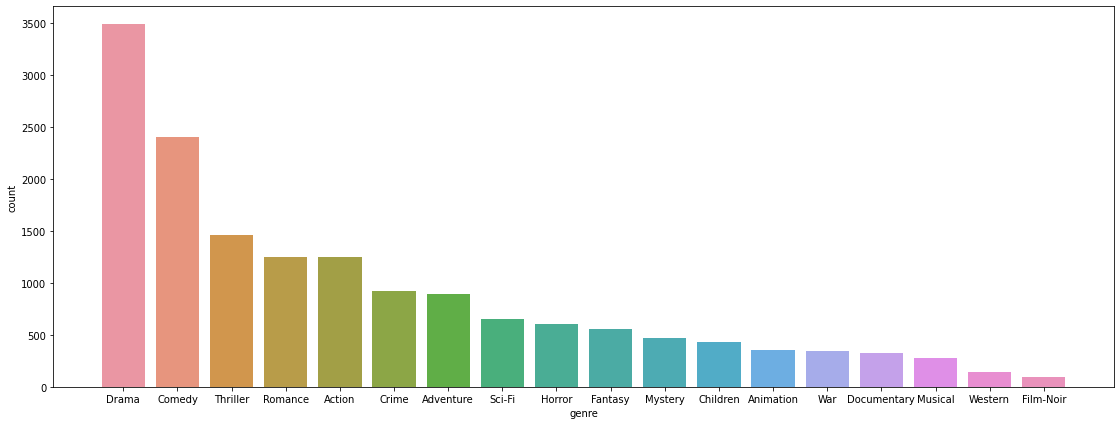

In [9]:
fig, ax = plt.subplots(figsize=(19,7))
ax = sns.countplot(data=genres,
                   x='genre',
                   order=genres['genre'].value_counts().index)
plt.plot()

## Directors

- 감독 1340명
- 영화 5503개. 전체 영화 개수보다 적음
- 한 영화에 감독이 14명인 경우도 있음(item 50912)

In [10]:
directors.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [75]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [11]:
directors['item'].nunique()

5503

In [12]:
directors['director'].value_counts()

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [13]:
directors[directors['item']==50912]

,item,director
239,50912,nm0000127
1074,50912,nm0000801
1281,50912,nm0001053
1298,50912,nm0001054
2013,50912,nm0001814
2893,50912,nm0149446
2932,50912,nm0158984
2979,50912,nm0170043
3026,50912,nm0190859
3938,50912,nm0481418


In [14]:
directors['item'].value_counts()

50912    14
1282     10
27002     8
7502      7
596       7
         ..
163       1
70        1
6566      1
5504      1
55768     1
Name: item, Length: 5503, dtype: int64

## Titles

- War of the Worlds (2005) 두 번 들어가 있음(item 34048, 64997)
- nunique: 6806

In [15]:
titles.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [74]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


In [16]:
titles['title'].value_counts()

War of the Worlds (2005)                     2
Shawshank Redemption, The (1994)             1
Jay and Silent Bob Strike Back (2001)        1
Naked Gun 33 1/3: The Final Insult (1994)    1
Quantum of Solace (2008)                     1
                                            ..
Brigadoon (1954)                             1
Son, The (Le fils) (2002)                    1
Secret Life of Walter Mitty, The (1947)      1
Them! (1954)                                 1
Girl Next Door, The (1999)                   1
Name: title, Length: 6806, dtype: int64

In [17]:
titles['title'].nunique()

6806

In [18]:
titles[titles['title'] == 'War of the Worlds (2005)']

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


## Years

- 데이터 6799개. 영화 제목 보다 7개 적음
- 1922 ~ 2014년 데이터
- 옛날 영화 비중이 적음

In [19]:
years.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [73]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [66]:
years['item'].value_counts()

1348      1
8644      1
31359     1
33603     1
32022     1
         ..
1611      1
3044      1
6721      1
1176      1
109850    1
Name: item, Length: 6799, dtype: int64

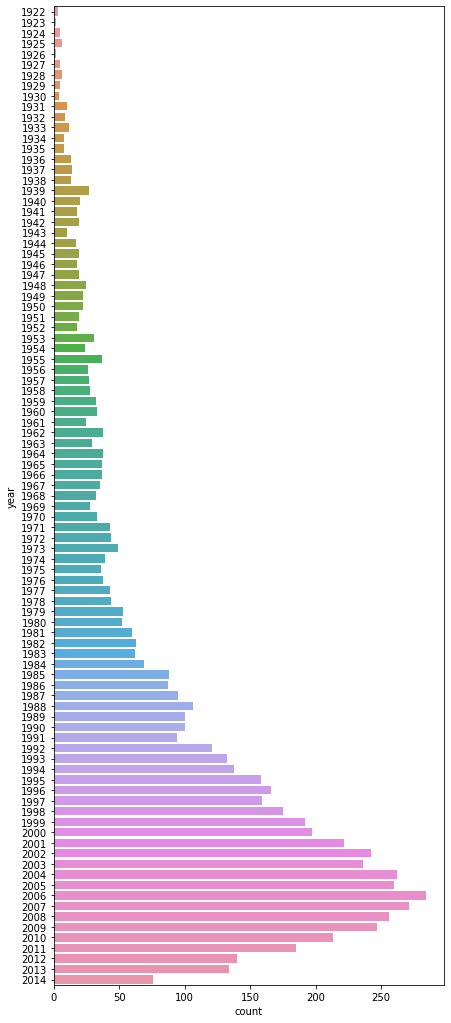

In [20]:
fig, ax = plt.subplots(figsize=(7,18))
ax = sns.countplot(data=years,
                   y='year')

## Writers

- 작가 2989명
- item 5648개. 전체 영화 개수는 6806개
- 영화 하나에 작가 24명있는 영화도 있음

In [21]:
writers.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [72]:
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [22]:
writers.nunique()

item      5648
writer    2989
dtype: int64

In [69]:
writers['item'].value_counts()

1907     24
783      23
364      21
2687     21
48322    19
         ..
79073     1
176       1
2560      1
42007     1
1237      1
Name: item, Length: 5648, dtype: int64

## Train ratings

- implicit feedback
- 데이터 5,154,471개
- 'user'가 'time'에 영화 'item'을 봄
- time은 unix time stamp. 1970년 1월 1일로부터 몇 초 지났는지. https://www.unixtimestamp.com/
- 2005년 4월 11일 ~ 2015년 3월 31일까지의 데이터
- 영화를 보고 긍정적, 부정적 피드백 여부는 알 수 없음

In [77]:
ratings.sample(5)

,user,item,time
2397716,63728,904,1323151762
890642,23571,1968,1286200912
1450261,38260,3072,1135187200
4293908,114758,5666,1115583418
3044017,81186,57274,1253390516


In [71]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [79]:
ratings['time'].sort_values()

4708943    1113220585
2384811    1113220936
2384812    1113220975
2120237    1113221625
2031959    1113222004
              ...    
2180308    1427780663
2180309    1427780680
2180310    1427781001
2180311    1427781048
2180312    1427781052
Name: time, Length: 5154471, dtype: int64

In [98]:
def convert_unixtime(unixtime):
    '''
    https://potensj.tistory.com/72
    '''
    date = datetime.datetime.fromtimestamp(unixtime).strftime('%Y-%m-%d %H:%M:%S')
    return date

In [99]:
convert_unixtime(1427781001)

'2015-03-31 05:50:01'

In [108]:
ratings['date'] = ratings['time'].apply(convert_unixtime)

In [110]:
ratings['date'].sort_values()

4708943    2005-04-11 11:56:25
2384811    2005-04-11 12:02:16
2384812    2005-04-11 12:02:55
2120237    2005-04-11 12:13:45
2031959    2005-04-11 12:20:04
                  ...         
2180308    2015-03-31 05:44:23
2180309    2015-03-31 05:44:40
2180310    2015-03-31 05:50:01
2180311    2015-03-31 05:50:48
2180312    2015-03-31 05:50:52
Name: date, Length: 5154471, dtype: object